> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [NO-SHOW APPOINTMENT DATA ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The data set will explore the no-show factor during medical appointnments. It will examine the reason why the no-show rate is high and this will be examined by analyzing the data set and breaking it down to get most crucial factors that impact the no-show appoitment. The no-show data is important as it will help the end-user understand which factors are most crucial when exploring the no-show and how these factors impact the no-show.


### Question(s) for Analysis
The questions for analyis will be two which include:
Research Question 1 What Factors are important for us to know in order to predict if a patient will show up for the scheduled appointments?
Research Question 2 (Which Illnesses (Hypertension & Diabetes) is the No-Show High?)



Step 1 Importing Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

Step 2: Loading Data and Printing a few lines

In [2]:
df_appointments = pd.read_csv('noshowappointments-2016.csv')
df_appointments.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

Exploring the data

In [3]:
df_appointments.shape

(110527, 14)

In [4]:
df_appointments.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
type(df_appointments['Gender'][0])

str

In [6]:
type(df_appointments['ScheduledDay'][0])

str

In [7]:
type(df_appointments['AppointmentDay'][0])

str

In [8]:
type(df_appointments['Neighbourhood'][0])

str

In [9]:
type(df_appointments['No-show'][0])

str

Confirm the datatypes using info()

In [10]:
df_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Check for Duplicates

In [11]:
sum(df_appointments.duplicated())

0

Check for Missing Values or NaN

In [12]:
df_appointments.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Conclusion - No missing or duplicated data found in the no-show appointmnents data set


### Data Cleaning
In this part of data cleaning, it will involve making the data more comprehendable and can be easily used in the analysis.Some of the cleaning practices that will be done at this stage involve:
Coverting data types into new data types (Objectt to Dates; Dates to Int)
Dropping unncessay columns (PatientId,AppointmentID,Neighbourhood, Scholarship)
Renaming columns with spelling erros such as (Hipertension; Hypertension)
Data grouping

 

Convert the ScheduledDay and AppointmentDay to datetimes and int

In [13]:
df_appointments['ScheduledDay'] = pd.to_datetime(df_appointments['ScheduledDay'])

In [14]:
df_appointments['AppointmentDay'] = pd.to_datetime(df_appointments['AppointmentDay'])

In [15]:
df_appointments.dtypes['ScheduledDay']

datetime64[ns, UTC]

In [16]:
df_appointments.dtypes['AppointmentDay']

datetime64[ns, UTC]

In [17]:
df_appointments['ScheduledDay'] = pd.to_datetime(df_appointments['ScheduledDay']).dt.strftime('%Y%m%d').astype(int)

In [18]:
df_appointments['AppointmentDay'] = pd.to_datetime(df_appointments['AppointmentDay']).dt.strftime('%Y%m%d').astype(int)

Drop Columns that are not relevant to the analysis

In [19]:
df_appointments.drop(columns = ['PatientId','AppointmentID','Neighbourhood', 'Scholarship'], inplace = True)

In [20]:
df_appointments.head()

Gender  ScheduledDay  AppointmentDay  Age  Hipertension  Diabetes  \
0      F      20160429        20160429   62             1         0   
1      M      20160429        20160429   56             0         0   
2      F      20160429        20160429   62             0         0   
3      F      20160429        20160429    8             0         0   
4      F      20160429        20160429   56             1         1   

   Alcoholism  Handcap  SMS_received No-show  
0           0        0             0      No  
1           0        0             0      No  
2           0        0             0      No  
3           0        0             0      No  
4           0        0             0      No

Correcting the Spelling Error in Hipertension and Handcap

In [21]:
df_appointments.rename(columns = {'Hipertension': 'Hypertension'}, inplace = True)
df_appointments.rename(columns = {'Handcap': 'Handicap'}, inplace = True)

In [22]:
df_appointments.head()

Gender  ScheduledDay  AppointmentDay  Age  Hypertension  Diabetes  \
0      F      20160429        20160429   62             1         0   
1      M      20160429        20160429   56             0         0   
2      F      20160429        20160429   62             0         0   
3      F      20160429        20160429    8             0         0   
4      F      20160429        20160429   56             1         1   

   Alcoholism  Handicap  SMS_received No-show  
0           0         0             0      No  
1           0         0             0      No  
2           0         0             0      No  
3           0         0             0      No  
4           0         0             0      No

Cleaning to ensure the column headers start with a small letter and an underscore for consistency

In [23]:
df_appointments.rename(columns = lambda x: x.strip().lower().replace(' ', '_'), inplace = True)

In [24]:
df_appointments.head()

gender  scheduledday  appointmentday  age  hypertension  diabetes  \
0      F      20160429        20160429   62             1         0   
1      M      20160429        20160429   56             0         0   
2      F      20160429        20160429   62             0         0   
3      F      20160429        20160429    8             0         0   
4      F      20160429        20160429   56             1         1   

   alcoholism  handicap  sms_received no-show  
0           0         0             0      No  
1           0         0             0      No  
2           0         0             0      No  
3           0         0             0      No  
4           0         0             0      No

Create a new column dataframe (Age Group) that categorizes the age

In [25]:
df_appointments.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [26]:
bins = [0, 2, 10,18, 35, 100]
labels = ['Infant', 'Young Child','Teen', 'Youth', 'Adult']
df_appointments['age_group'] = pd.cut(df_appointments['age'], bins = bins, labels = labels, right = False)
#To Replace unknown -1 use
df_appointments['age_group'] = df_appointments['age_group'].cat.add_categories('Unknown').fillna('Unknown')

In [27]:
df_appointments.head()

gender  scheduledday  appointmentday  age  hypertension  diabetes  \
0      F      20160429        20160429   62             1         0   
1      M      20160429        20160429   56             0         0   
2      F      20160429        20160429   62             0         0   
3      F      20160429        20160429    8             0         0   
4      F      20160429        20160429   56             1         1   

   alcoholism  handicap  sms_received no-show    age_group  
0           0         0             0      No        Adult  
1           0         0             0      No        Adult  
2           0         0             0      No        Adult  
3           0         0             0      No  Young Child  
4           0         0             0      No        Adult

Create a new_column that shows the duration which is the difference between the scheduledday and appointment day to get how long patients wait before the appointment.

In [28]:
df_appointments['duration'] = df_appointments['appointmentday'] - df_appointments['scheduledday']

In [29]:
df_appointments.head()

gender  scheduledday  appointmentday  age  hypertension  diabetes  \
0      F      20160429        20160429   62             1         0   
1      M      20160429        20160429   56             0         0   
2      F      20160429        20160429   62             0         0   
3      F      20160429        20160429    8             0         0   
4      F      20160429        20160429   56             1         1   

   alcoholism  handicap  sms_received no-show    age_group  duration  
0           0         0             0      No        Adult         0  
1           0         0             0      No        Adult         0  
2           0         0             0      No        Adult         0  
3           0         0             0      No  Young Child         0  
4           0         0             0      No        Adult         0

Check the data types before EDA

In [30]:
df_appointments.dtypes

gender              object
scheduledday         int32
appointmentday       int32
age                  int64
hypertension         int64
diabetes             int64
alcoholism           int64
handicap             int64
sms_received         int64
no-show             object
age_group         category
duration             int32
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 What Factors are important for us to know in order to predict if a patient will show up for the scheduled appointments?

Use the groupby method to group by no-show and find the mean values for ploting

Factor 1 Age- To determine the mean no-show by age factor 

In [31]:
df_appointments.groupby('no-show')['age'].describe().loc[:,['mean', 'std']]


mean        std
no-show                      
No       37.790064  23.338878
Yes      34.317667  21.965941

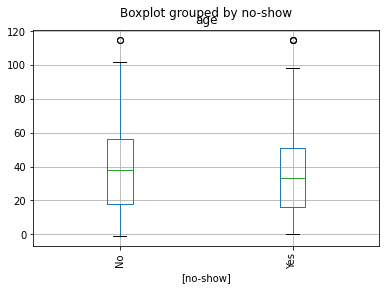

In [32]:
df_appointments.boxplot(column = ['age'], by = ['no-show'] ,rot = 90)
plt.ylabel = ('Age')


Conclusion
Relevance of Examining the age as a Factor: Age is integral as it helps us determine if younger or older people are more likley to show up for an appointment and further examine what factors affect their low turn up of either group.

The analyis employed both the mean and standard deviation in examining the age by no-show. A box-plot was used to visualize the mean and standard deviation because of its simplicity in capturing data.From the above statistical computations,the mean denotes the average values of the age by no-show Yes and No while the standard deviation is the deviation from the mean and analyzes the dispersion in relation to the mean. In this case from the boxplot, it can observed younger people average of 34.32 years are more likely to not show up for their appointment compared to adults aged 37.79 years. Therefore, the no-show is likely to be higher among younger people compared to older people.

Factor 2- Duration- The wait time before the appointment day

In [33]:
df_appointments.groupby('no-show')['duration'].describe()

count       mean         std  min  25%   50%   75%     max
no-show                                                              
No       88208.0  36.647243  211.904567  0.0  0.0   2.0  76.0  9396.0
Yes      22319.0  65.504055  277.103317 -6.0  4.0  72.0  92.0  9396.0

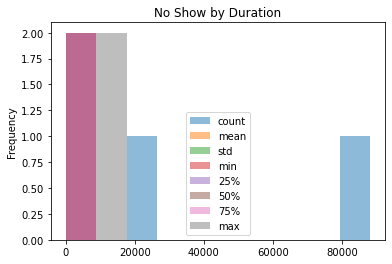

In [34]:
df_appointments.groupby('no-show')['duration'].describe().plot(kind = 'hist', alpha = 0.5, title = 'No Show by Duration')
plt.legend()

Conclusion 

Relevance of Duration - It examines the period between when the appointment is scheduled and when the person shows up for the appointment. The question is relevant as it helps examine whether the longer the waiting period the higher the no-show or the inverse is true

The data applied the use of descriptive statistics that was useful in examining the measures of central tendency which examined the mean, mode, and median.A histogram was used to explore the data and visulize the summary statistics as it is easy to examine and visualize the data set.It also showed the standard deviation, upper, middle( median), and lower quartiles which were useful in exploring the no-show by duration. It can be seen that the median, mean and std is higher in value for where the duration is higher and the value of yes. It can be denoted that more people are likely to fail and attend their appointment when the duration the period between scheduled appointment and appoinment day is high. Therefore, the summary statistics show the no-show is high when the waiting period is high and low when the waiting period is low. The duration has a direct and positive relationship with no-show.


Factor 3 Sms_Received- If a person received a text message to attend the appointment

In [35]:
df_appointments.groupby('no-show')['sms_received'].mean()

no-show
No     0.291334
Yes    0.438371
Name: sms_received, dtype: float64

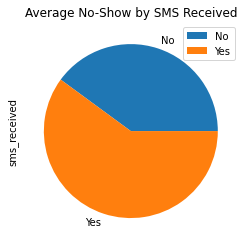

In [36]:
df_appointments.groupby('no-show')['sms_received'].mean().plot(kind = 'pie', title = 'Average No-Show by SMS Received')
plt.legend()

Conclusion =
Relevance of the Question: It examines whether if on average if a person receives an SMS they are likely to show up for an appointment. 

It used a pie chart to capture the no-show by SMS which would should the bi-variate relation between these two variables.
The SMS received mean is higher for people who did not show up for the appointment (0.438371) compared to those who received and showed up for the appointment (0.291334). Hence, those who showed up for the appointment received the message as well as those who did not show up for the appointmnent who were the higher majority. From the age data, this disqualifies SMS as a reason why young people are not showing up for appointments and other factors need to be examined further to determine why they are missing appointments.

### Research Question 2  (Which Illnesses (Hypertension & Diabetes) is the No-Show High?)

In [37]:
df_hyp = df_appointments.groupby('no-show')['hypertension'].mean()

In [38]:
df_diab = df_appointments.groupby('no-show')['diabetes'].mean()

In [39]:
# correcting str type error
from importlib import reload
plt=reload(plt)

Text(0, 0.5, 'Average No-Show by Hypertension')

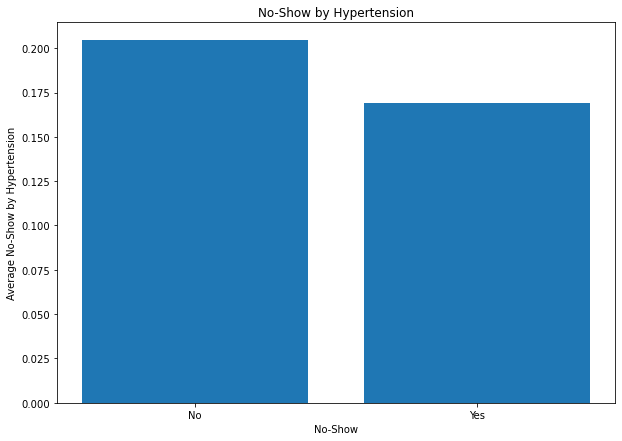

In [40]:
plt.subplots(figsize = (10,7))
plt.bar(df_hyp.index, df_hyp)
plt.title('No-Show by Hypertension')
plt.xlabel('No-Show')
plt.ylabel('Average No-Show by Hypertension')



Conclusion
Relevance of the Question: Examinig No-Show by Hypertension examines if the no-show rate is higher among diabetic patients.
A bar graph which is simple to The summary statistic used is the mean that examines the average of the diabetic patients by no-show and it can be seen that most patients with hypertenison will attend their appointments compared to those who did not show up for their appointment (0.215 vis-a-vis 0.165). However, the deviation is not so high between those who attended and those who did not attend but with more patients attending their appointments.

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

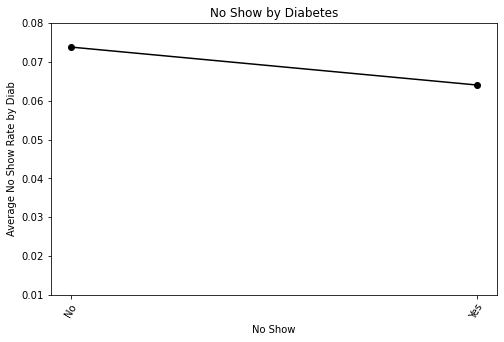

In [41]:
plt.subplots(figsize = (8,5))
plt.plot(df_diab.index, df_diab, color="black",marker = "o")
plt.title('No Show by Diabetes')
plt.xlabel('No Show')
plt.ylabel('Average No Show Rate by Diab')
plt.yticks([0.010, 0.020, 0.030, 0.040, 0.050, 0.060, 0.070, 0.080])
plt.xticks(rotation=60)

Conclusion
Relevance of the Question: The question was useful as it helped examine the if diabetic patients are more likley to miss or show up for their appointment.

A simple line graph was used which helped examine the the no-show by average duration and it could be seen that more patients did not miss their appointment. The summary statistic mean helped show the average value of diabetes by no-show. Therefore, it can be seen from the line graph the no-show is less among diabetic patients as comapared to those who did not show up for the appointment as shown by the sloping line graph. However, it is important to note that the variation is not high as some patients can fail to show up for their appointment.


array([[<AxesSubplot:xlabel='scheduledday', ylabel='scheduledday'>,
        <AxesSubplot:xlabel='appointmentday', ylabel='scheduledday'>,
        <AxesSubplot:xlabel='age', ylabel='scheduledday'>,
        <AxesSubplot:xlabel='hypertension', ylabel='scheduledday'>,
        <AxesSubplot:xlabel='diabetes', ylabel='scheduledday'>,
        <AxesSubplot:xlabel='alcoholism', ylabel='scheduledday'>,
        <AxesSubplot:xlabel='handicap', ylabel='scheduledday'>,
        <AxesSubplot:xlabel='sms_received', ylabel='scheduledday'>,
        <AxesSubplot:xlabel='duration', ylabel='scheduledday'>],
       [<AxesSubplot:xlabel='scheduledday', ylabel='appointmentday'>,
        <AxesSubplot:xlabel='appointmentday', ylabel='appointmentday'>,
        <AxesSubplot:xlabel='age', ylabel='appointmentday'>,
        <AxesSubplot:xlabel='hypertension', ylabel='appointmentday'>,
        <AxesSubplot:xlabel='diabetes', ylabel='appointmentday'>,
        <AxesSubplot:xlabel='alcoholism', ylabel='appointmentday'>,
 

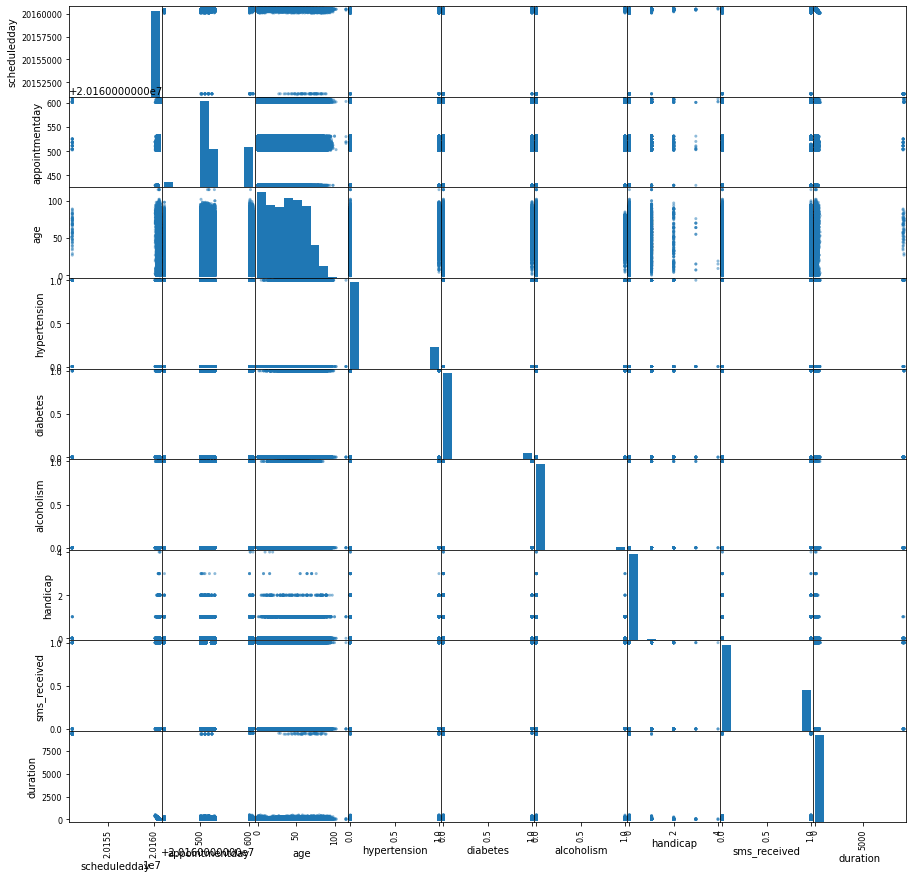

In [42]:
pd.plotting.scatter_matrix(df_appointments, alpha = 0.5, figsize =(15,15))

Denotes the relatioship betwenen various variables using a scatter matrix

Summary & Conclusion 

The mean no-show by hypertension and diabetes shows that patients are willing to show up for their appointments with the NO value higher compared to the Yes value. However, the magnitude varies with more patients with hypertension likely to show up for their appointments compared to diabetic patients. The No graph for hypertension has a wider variation compared with the Yes in the same graph while in the no-show for diabetic the variation is less.


Research Question 1
The factors that affect no-show include age, duration, and sms_received
The age and duration have a more significant impact on the data set with more youths likely not to show up for an appointment compared to adults who are aged 35 and above.
The duration a patient waits before their appointment have a significant impact on whether they show up for the appointment or not hence the higher the duration the less likely they are to show up for the appointment.
The sms_received has the least impact since despite people receiving sms they fail to show up for the appointments. Therefore, this is a concept that needs further analysis.

Research Question 2
Both diabetic and hypertension patients will attend their sessions but hypertension patients have a higher mean by no-show of not missing appointments compared to diabetic. In both cases, more patients will show up for their appointments as the average value is higher for NO compared to that of YES. Therefore, people suffering from hypertension are more likely to attend their appointments in comparison to diabetic patients.

Questions to Further Explore
1. Why are text messages (sms) have a least impact on the no-show?
2. What can be done to make sms more effective form in comunicating regarding ones appointment?
3. What factors influence the duration and how can the duration be reduced?

Limitation of the Study
1. The study is limited in the number of samples used is very large and may contain outliers

Resources:
Stackoverflow and Udacity Lessons

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1